In [1]:
import pandas as pd
import re
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import os # accessing directory structure
#print(os.listdir("../input"))
#set seed
np.random.seed(12345) # receive the same random numbers each execution
print('setup complete')

setup complete


# Data Pre-processing

In [2]:
#notclean = pd.read_csv("add file path\AAII_Sentiment.csv")
notclean.head()

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
0,2019-06-27,0.295890,0.383562,0.320548,1.000000,0.288630,-0.024658,0.381644,0.482854,0.280434,2964.15,2911.43,2913.78
1,2019-06-20,0.295082,0.383607,0.321311,1.000000,0.300425,-0.026229,0.381644,0.482854,0.280434,2931.74,2874.68,2926.46
2,2019-06-13,0.268398,0.389610,0.341991,0.999999,0.305443,-0.073593,0.381644,0.482854,0.280434,2910.61,2800.92,2879.84
3,2019-06-06,0.225275,0.348901,0.425824,1.000000,0.318847,-0.200549,0.381644,0.482854,0.280434,2827.28,2728.81,2826.15
4,2019-05-30,0.247934,0.351240,0.400826,1.000000,0.341048,-0.152892,0.381644,0.482854,0.280434,2868.88,2766.06,2783.02


In [3]:
aaii_sentiment = notclean.drop(['Total','Bullish 8-Week Mov Avg', 'Bull-Bear Spread', 'Bullish Average', 'Bullish Average + St. Dev', 'Bullish Average - St. Dev'], axis=1)
aaii_sentiment.head()

,Date,Bullish,Neutral,Bearish,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
0,2019-06-27,0.295890,0.383562,0.320548,2964.15,2911.43,2913.78
1,2019-06-20,0.295082,0.383607,0.321311,2931.74,2874.68,2926.46
2,2019-06-13,0.268398,0.389610,0.341991,2910.61,2800.92,2879.84
3,2019-06-06,0.225275,0.348901,0.425824,2827.28,2728.81,2826.15
4,2019-05-30,0.247934,0.351240,0.400826,2868.88,2766.06,2783.02


In [4]:
aaii_sentiment = aaii_sentiment.sort_values(by='Date', ascending=True)
aaii_sentiment.head()

,Date,Bullish,Neutral,Bearish,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
1667,1987-06-26,NaN,NaN,NaN,NaN,NaN,NaN
1666,1987-07-17,NaN,NaN,NaN,314.59,307.63,314.59
1665,1987-07-24,0.36,0.50,0.14,311.39,307.81,309.27
1664,1987-07-31,0.26,0.48,0.26,318.66,310.65,318.66
1663,1987-08-07,0.56,0.15,0.29,323.00,316.23,323.00


In [5]:
aaii_sentiment = aaii_sentiment.set_index(pd.DatetimeIndex(aaii_sentiment['Date']))
aaii_sentiment = aaii_sentiment.drop(['Date'], axis=1)
aaii_sentiment.head()

,Bullish,Neutral,Bearish,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,
1987-06-26,NaN,NaN,NaN,NaN,NaN,NaN
1987-07-17,NaN,NaN,NaN,314.59,307.63,314.59
1987-07-24,0.36,0.50,0.14,311.39,307.81,309.27
1987-07-31,0.26,0.48,0.26,318.66,310.65,318.66
1987-08-07,0.56,0.15,0.29,323.00,316.23,323.00


In [6]:
dfn = pd.read_csv("Z:\Dokumente\Studium\Bachelorthesis\VIX_2004-present.csv")
dfn.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61


In [7]:
dfo = pd.read_csv("Z:\Dokumente\Studium\Bachelorthesis\VIX_1990-2003.csv")
dfo.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,01/02/1990,NaN,NaN,NaN,17.24
1,01/03/1990,NaN,NaN,NaN,18.19
2,01/04/1990,NaN,NaN,NaN,19.22
3,01/05/1990,NaN,NaN,NaN,20.11
4,01/08/1990,NaN,NaN,NaN,20.26


In [8]:
frames = [dfo, dfn]
vix = pd.concat(frames)

In [9]:
vix

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,01/02/1990,NaN,NaN,NaN,17.24
1,01/03/1990,NaN,NaN,NaN,18.19
2,01/04/1990,NaN,NaN,NaN,19.22
3,01/05/1990,NaN,NaN,NaN,20.11
4,01/08/1990,NaN,NaN,NaN,20.26
5,01/09/1990,NaN,NaN,NaN,22.20
6,01/10/1990,NaN,NaN,NaN,22.44
7,01/11/1990,NaN,NaN,NaN,20.05
8,01/12/1990,NaN,NaN,NaN,24.64
9,01/15/90,NaN,NaN,NaN,26.34


In [9]:
vix.index = pd.to_datetime(vix.index)
vix = vix.set_index('Date')
vix.head()

,VIX Open,VIX High,VIX Low,VIX Close
Date,,,,
01/02/1990,NaN,NaN,NaN,17.24
01/03/1990,NaN,NaN,NaN,18.19
01/04/1990,NaN,NaN,NaN,19.22
01/05/1990,NaN,NaN,NaN,20.11
01/08/1990,NaN,NaN,NaN,20.26


In [10]:
aaii_vix = pd.merge(aaii_sentiment, vix, how='inner', left_index=True, right_index=True)
aaii_vix.head()

,Bullish,Neutral,Bearish,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close,VIX Open,VIX High,VIX Low,VIX Close
Date,,,,,,,,,,
1990-01-05,0.40,0.30,0.30,359.69,352.20,352.20,NaN,NaN,NaN,20.11
1990-01-12,0.45,0.38,0.17,353.79,339.93,339.93,NaN,NaN,NaN,24.64
1990-01-19,0.31,0.49,0.20,340.75,337.00,339.15,NaN,NaN,NaN,22.50
1990-01-26,0.24,0.38,0.38,331.61,325.80,325.80,NaN,NaN,NaN,26.28
1990-02-02,0.15,0.37,0.48,330.92,322.98,330.92,NaN,NaN,NaN,24.32


In [11]:
aaii_vix

,Bullish,Neutral,Bearish,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close,VIX Open,VIX High,VIX Low,VIX Close
Date,,,,,,,,,,
1990-01-05,0.400000,0.300000,0.300000,359.69,352.20,352.20,NaN,NaN,NaN,20.11
1990-01-12,0.450000,0.380000,0.170000,353.79,339.93,339.93,NaN,NaN,NaN,24.64
1990-01-19,0.310000,0.490000,0.200000,340.75,337.00,339.15,NaN,NaN,NaN,22.50
1990-01-26,0.240000,0.380000,0.380000,331.61,325.80,325.80,NaN,NaN,NaN,26.28
1990-02-02,0.150000,0.370000,0.480000,330.92,322.98,330.92,NaN,NaN,NaN,24.32
1990-02-09,0.190000,0.300000,0.510000,333.75,329.66,333.62,NaN,NaN,NaN,23.69
1990-02-16,0.230000,0.430000,0.340000,334.89,330.08,332.72,NaN,NaN,NaN,20.78
1990-02-23,0.240000,0.380000,0.380000,327.99,324.15,324.15,NaN,NaN,NaN,23.69
1990-03-02,0.210000,0.370000,0.420000,335.54,328.67,335.54,NaN,NaN,NaN,21.34


In [12]:
aaii_vix = aaii_vix.drop(['S&P 500 Weekly High','S&P 500 Weekly Low','S&P 500 Weekly Close'], axis=1)
aaii_vix.head()

,Bullish,Neutral,Bearish,VIX Open,VIX High,VIX Low,VIX Close
Date,,,,,,,
1990-01-05,0.40,0.30,0.30,NaN,NaN,NaN,20.11
1990-01-12,0.45,0.38,0.17,NaN,NaN,NaN,24.64
1990-01-19,0.31,0.49,0.20,NaN,NaN,NaN,22.50
1990-01-26,0.24,0.38,0.38,NaN,NaN,NaN,26.28
1990-02-02,0.15,0.37,0.48,NaN,NaN,NaN,24.32


In [14]:
aaii_vix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 1990-01-05 to 2019-06-27
Data columns (total 7 columns):
Bullish      1508 non-null float64
Neutral      1508 non-null float64
Bearish      1508 non-null float64
VIX Open     1405 non-null float64
VIX High     1405 non-null float64
VIX Low      1405 non-null float64
VIX Close    1507 non-null float64
dtypes: float64(7)
memory usage: 94.3 KB


# Exploratory Analysis

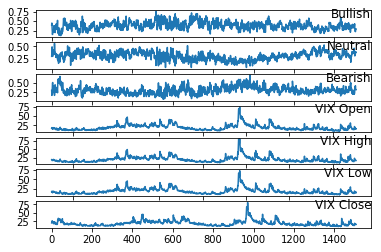

In [14]:
values = aaii_vix.values
groups = [0,1,2,3,4,5,6]
i = 1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values[:,group])
    pyplot.title(aaii_vix.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

In [15]:
aaii_vix.describe()

,Bullish,Neutral,Bearish,VIX Open,VIX High,VIX Low,VIX Close
count,1508.000000,1508.000000,1508.000000,1405.000000,1405.000000,1405.000000,1507.000000
mean,0.386187,0.308044,0.305768,19.040384,19.888861,18.349886,19.136928
std,0.099412,0.079432,0.095417,7.875121,8.348454,7.516376,7.716715
min,0.120000,0.076900,0.066700,9.010000,9.310000,8.920000,9.190000
25%,0.312500,0.250000,0.239540,13.350000,13.990000,12.920000,13.610000
50%,0.380000,0.310000,0.294192,17.010000,17.800000,16.310000,17.110000
75%,0.449775,0.365633,0.360000,22.440000,23.290000,21.710000,22.480000
max,0.750000,0.560000,0.702700,74.260000,81.480000,72.760000,80.860000


In [16]:
cor = aaii_vix.corr()
cor

,Bullish,Neutral,Bearish,VIX Open,VIX High,VIX Low,VIX Close
Bullish,1.000000,-0.448800,-0.668239,-0.069848,-0.084377,-0.060841,-0.102160
Neutral,-0.448800,1.000000,-0.364908,-0.267171,-0.259363,-0.265383,-0.261568
Bearish,-0.668239,-0.364908,1.000000,0.302725,0.311282,0.291732,0.323708
VIX Open,-0.069848,-0.267171,0.302725,1.000000,0.991120,0.996093,0.988270
VIX High,-0.084377,-0.259363,0.311282,0.991120,1.000000,0.990589,0.994364
VIX Low,-0.060841,-0.265383,0.291732,0.996093,0.990589,1.000000,0.993302
VIX Close,-0.102160,-0.261568,0.323708,0.988270,0.994364,0.993302,1.000000


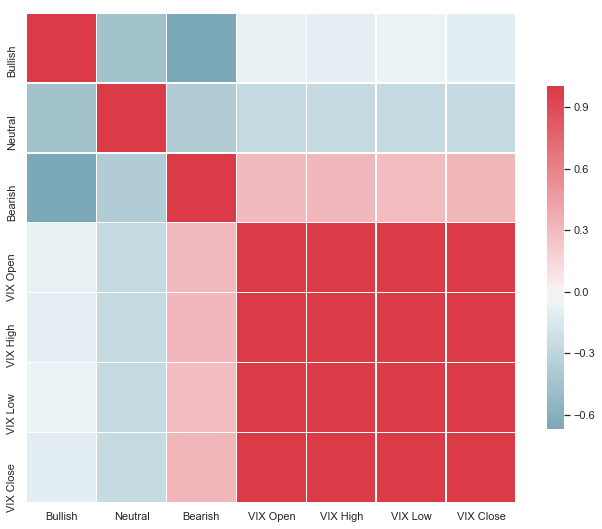

In [17]:
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

C:\Users\Dennis Thumm\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


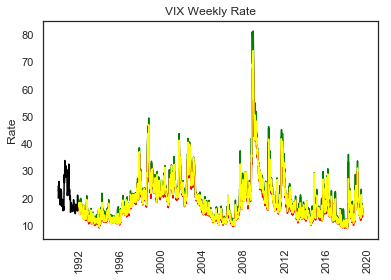

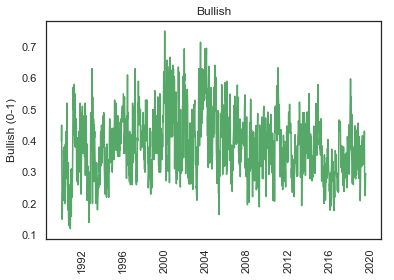

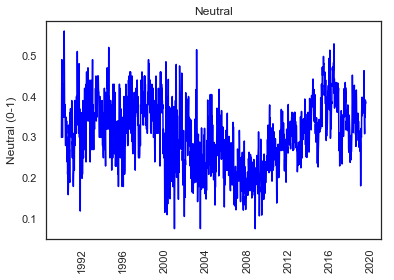

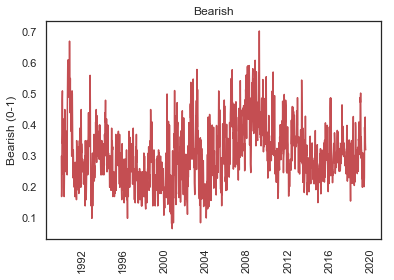

In [18]:
plt.plot(aaii_vix.index, aaii_vix['VIX Close'], 'black', label = 'VIX Close')
plt.plot(aaii_vix.index, aaii_vix['VIX High'], 'green', label = 'VIX High')
plt.plot(aaii_vix.index, aaii_vix['VIX Low'], 'red', label = 'VIX Low')
plt.plot(aaii_vix.index, aaii_vix['VIX Open'], 'yellow', label = 'VIX Open')
plt.title('VIX Weekly Rate')
plt.xticks(rotation='vertical')
plt.ylabel('Rate');
plt.show();

plt.plot(aaii_vix.index, aaii_vix['Bullish'], 'g')
plt.title('Bullish')
plt.xticks(rotation='vertical')
plt.ylabel('Bullish (0-1)');
plt.show();

plt.plot(aaii_vix.index, aaii_vix['Neutral'], 'blue')
plt.title('Neutral')
plt.xticks(rotation='vertical')
plt.ylabel('Neutral (0-1)');
plt.show();

plt.plot(aaii_vix.index, aaii_vix['Bearish'], 'r')
plt.title('Bearish')
plt.xticks(rotation='vertical')
plt.ylabel('Bearish (0-1)');
plt.show();
#plt.legend()

In [19]:
#LSTM Prep
df = aaii_vix
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 1990-01-05 to 2019-06-27
Data columns (total 7 columns):
Bullish      1508 non-null float64
Neutral      1508 non-null float64
Bearish      1508 non-null float64
VIX Open     1405 non-null float64
VIX High     1405 non-null float64
VIX Low      1405 non-null float64
VIX Close    1507 non-null float64
dtypes: float64(7)
memory usage: 94.3 KB


In [20]:
df = df.drop(['VIX Open', 'VIX High', 'VIX Low'], axis=1)
df.head()

,Bullish,Neutral,Bearish,VIX Close
Date,,,,
1990-01-05,0.40,0.30,0.30,20.11
1990-01-12,0.45,0.38,0.17,24.64
1990-01-19,0.31,0.49,0.20,22.50
1990-01-26,0.24,0.38,0.38,26.28
1990-02-02,0.15,0.37,0.48,24.32


In [21]:
df = df[['VIX Close', 'Bullish', 'Neutral', 'Bearish']]
df.head()

,VIX Close,Bullish,Neutral,Bearish
Date,,,,
1990-01-05,20.11,0.40,0.30,0.30
1990-01-12,24.64,0.45,0.38,0.17
1990-01-19,22.50,0.31,0.49,0.20
1990-01-26,26.28,0.24,0.38,0.38
1990-02-02,24.32,0.15,0.37,0.48


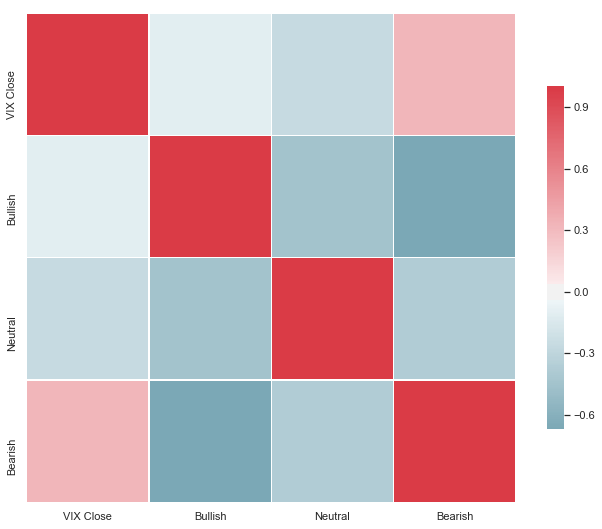

In [22]:
cor = df.corr()
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink":.7})
plt.show()

In [32]:
aaii_vix.median()

Bullish       0.380000
Neutral       0.310000
Bearish       0.294192
VIX Open     17.010000
VIX High     17.800000
VIX Low      16.310000
VIX Close    17.110000
dtype: float64

# LSTM Model

In [38]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('vars%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [39]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [40]:
values = df.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[['VIX Close', 'Bullish', 'Neutral', 'Bearish']]
df.head()

,VIX Close,Bullish,Neutral,Bearish
Date,,,,
1990-01-05,20.11,0.40,0.30,0.30
1990-01-12,24.64,0.45,0.38,0.17
1990-01-19,22.50,0.31,0.49,0.20
1990-01-26,26.28,0.24,0.38,0.38
1990-02-02,24.32,0.15,0.37,0.48


In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [42]:
n_days = 7 #adding 7 days lags creating number of observations
n_features = 4 #features in the dataset
n_obs = n_days*n_features

In [43]:
reframed = series_to_supervised(scaled, n_days, 1)
reframed.head()

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),...,var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
7,0.152365,0.444444,0.461809,0.366824,0.215571,0.523810,0.627406,0.162421,0.185712,0.301587,...,0.461809,0.697013,0.161713,0.174603,0.730905,0.429717,0.202316,0.190476,0.627406,0.492610
8,0.215571,0.523810,0.627406,0.162421,0.185712,0.301587,0.855102,0.209591,0.238454,0.190476,...,0.730905,0.429717,0.202316,0.190476,0.627406,0.492610,0.169527,0.142857,0.606707,0.555503
9,0.185712,0.301587,0.855102,0.209591,0.238454,0.190476,0.627406,0.492610,0.211106,0.047619,...,0.627406,0.492610,0.169527,0.142857,0.606707,0.555503,0.155016,0.158730,0.710205,0.461164
10,0.238454,0.190476,0.627406,0.492610,0.211106,0.047619,0.606707,0.649843,0.202316,0.111111,...,0.606707,0.555503,0.155016,0.158730,0.710205,0.461164,0.117622,0.206349,0.565307,0.524057
11,0.211106,0.047619,0.606707,0.649843,0.202316,0.111111,0.461809,0.697013,0.161713,0.174603,...,0.710205,0.461164,0.117622,0.206349,0.565307,0.524057,0.157249,0.396825,0.648106,0.272484


In [44]:
print(reframed.head())

    var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var1(t-6)  var2(t-6)  \
7    0.152365   0.444444   0.461809   0.366824   0.215571   0.523810   
8    0.215571   0.523810   0.627406   0.162421   0.185712   0.301587   
9    0.185712   0.301587   0.855102   0.209591   0.238454   0.190476   
10   0.238454   0.190476   0.627406   0.492610   0.211106   0.047619   
11   0.211106   0.047619   0.606707   0.649843   0.202316   0.111111   

    var3(t-6)  var4(t-6)  var1(t-5)  var2(t-5)  ...  var3(t-2)  var4(t-2)  \
7    0.627406   0.162421   0.185712   0.301587  ...   0.461809   0.697013   
8    0.855102   0.209591   0.238454   0.190476  ...   0.730905   0.429717   
9    0.627406   0.492610   0.211106   0.047619  ...   0.627406   0.492610   
10   0.606707   0.649843   0.202316   0.111111  ...   0.606707   0.555503   
11   0.461809   0.697013   0.161713   0.174603  ...   0.710205   0.461164   

    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)  \
7    0.161713   0.174603

In [45]:
values = reframed.values
n_train_days = 1055 #1507*.7
train = values[:n_train_days, :]
test = values[n_train_days:, :]
train.shape

(1055, 32)

In [46]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [47]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1055, 7, 4) (1055,) (423, 7, 4) (423,)


In [48]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))# number of units?, stateful=True?
model.add(Dense(1)) #single output value
model.compile(loss='mae', optimizer='adam', metrics=['mse','mape']) #metrics=['mse', 'mape'] to further check optimal epoch size
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False, validation_split=0.2)
# plot history, bacht_size=n_train_days*.03

Train on 1055 samples, validate on 423 samples
Epoch 1/50
 - 2s - loss: 0.0769 - mean_squared_error: 0.0122 - mean_absolute_percentage_error: 62.3416 - val_loss: 0.0843 - val_mean_squared_error: 0.0094 - val_mean_absolute_percentage_error: 352665.2913
Epoch 2/50
 - 0s - loss: 0.0729 - mean_squared_error: 0.0100 - mean_absolute_percentage_error: 83.9510 - val_loss: 0.0804 - val_mean_squared_error: 0.0085 - val_mean_absolute_percentage_error: 335314.4641
Epoch 3/50
 - 0s - loss: 0.0688 - mean_squared_error: 0.0091 - mean_absolute_percentage_error: 76.3772 - val_loss: 0.0747 - val_mean_squared_error: 0.0074 - val_mean_absolute_percentage_error: 311537.3496
Epoch 4/50
 - 0s - loss: 0.0644 - mean_squared_error: 0.0080 - mean_absolute_percentage_error: 71.8985 - val_loss: 0.0723 - val_mean_squared_error: 0.0069 - val_mean_absolute_percentage_error: 297914.8350
Epoch 5/50
 - 0s - loss: 0.0613 - mean_squared_error: 0.0073 - mean_absolute_percentage_error: 68.2808 - val_loss: 0.0679 - val_mean_

Epoch 41/50
 - 0s - loss: 0.0277 - mean_squared_error: 0.0021 - mean_absolute_percentage_error: 22.0802 - val_loss: 0.0277 - val_mean_squared_error: 0.0019 - val_mean_absolute_percentage_error: 12196.1294
Epoch 42/50
 - 0s - loss: 0.0277 - mean_squared_error: 0.0021 - mean_absolute_percentage_error: 22.0129 - val_loss: 0.0276 - val_mean_squared_error: 0.0018 - val_mean_absolute_percentage_error: 13357.6504
Epoch 43/50
 - 0s - loss: 0.0276 - mean_squared_error: 0.0021 - mean_absolute_percentage_error: 21.9475 - val_loss: 0.0276 - val_mean_squared_error: 0.0018 - val_mean_absolute_percentage_error: 14322.8504
Epoch 44/50
 - 0s - loss: 0.0276 - mean_squared_error: 0.0021 - mean_absolute_percentage_error: 21.9389 - val_loss: 0.0276 - val_mean_squared_error: 0.0018 - val_mean_absolute_percentage_error: 12874.0101
Epoch 45/50
 - 0s - loss: 0.0275 - mean_squared_error: 0.0021 - mean_absolute_percentage_error: 21.8516 - val_loss: 0.0275 - val_mean_squared_error: 0.0018 - val_mean_absolute_perc

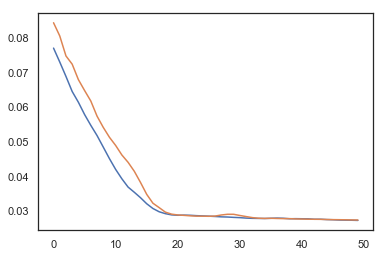

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend
plt.show()

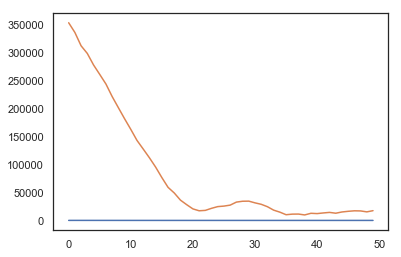

In [50]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='test')
plt.legend
plt.show()

In [51]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days * n_features,))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -3:]), axis=1) #-3 für Anzahl der Features (4-3=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -3:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
mae =(mean_absolute_error(inv_y, inv_yhat))
print('Test MAE: %.3f' % mae)
mape =(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % mape)

Test MSE: 9.109
Test RMSE: 3.018
Test MAE: 1.962
Test MAPE: 10.973


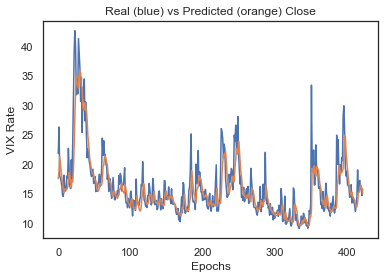

In [52]:
plt.plot(inv_y, label='Real')#blue
plt.plot(inv_yhat, label='Predicted')#orange
plt.title('Real (blue) vs Predicted (orange) Close')
plt.ylabel('VIX Rate')
plt.xlabel('Epochs')
plt.show()